# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
import matplotlib.pyplot as plt
import requests
import json
from scipy import stats
import pandas as pd
from api_keys import weather_api_key
from api_keys import g_key
from citipy import citipy
from pprint import pprint
import numpy as np


long = np.random.uniform(-180, 180, 1500)
lat = np.random.uniform(-90,90,1500)

url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'metric'
api_key = weather_api_key

query_url = f"{url}appid={api_key}&units={units}&q="

## Generate Cities List

In [5]:

long_lat = zip(lat, long)
cities = []
countries=[]
for i in long_lat:
    city = citipy.nearest_city(i[0], i[1]).city_name
    cities.append(city)
    country = citipy.nearest_city(i[0], i[1]).country_code
    countries.append(country)
df = pd.DataFrame({'City': cities,
                  'Country': countries})
df_clean = df.drop_duplicates(subset=["City"])
df_clean = df_clean.reset_index(drop = True)
clean_cities = []
for i in cities:
    if i not in clean_cities:
        clean_cities.append(i)
        

df_clean['City'].count()


619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
temperature = []
humidity = []
cloudiness = []
wind = []
longitude = []
latitude = []
date = []
for city in clean_cities:
    

    try:
        response = requests.get(query_url + city).json()
        longitude.append(response['coord']['lon'])
        latitude.append(response['coord']['lat'])
        temperature.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        date.append(response['dt'])
        print(f'Processing Record | {city}')
          
    except:
        print(f'{city} not found')
        longitude.append(np.nan)
        latitude.append(np.nan)
        temperature.append(np.nan)
        humidity.append(np.nan)
        cloudiness.append(np.nan)
        wind.append(np.nan)
        date.append(np.nan)
        
        pass
    



Processing Record | sioux lookout
Processing Record | kavieng
Processing Record | hilo
amderma not found
Processing Record | vao
Processing Record | punta arenas
Processing Record | new norfolk
Processing Record | northam
Processing Record | vaini
Processing Record | kapaa
Processing Record | hasaki
Processing Record | tasiilaq
Processing Record | mahebourg
Processing Record | bubaque
Processing Record | impfondo
Processing Record | busselton
Processing Record | mataura
Processing Record | sabha
Processing Record | avarua
Processing Record | panama city
Processing Record | upernavik
Processing Record | sosnovo-ozerskoye
Processing Record | san vicente
Processing Record | rikitea
taolanaro not found
Processing Record | broken hill
Processing Record | port lincoln
Processing Record | chimore
Processing Record | ambagarh chauki
mys shmidta not found
Processing Record | port augusta
Processing Record | jamestown
Processing Record | korla
Processing Record | batagay-alyta
Processing Record 

In [7]:
df_clean['Latitude'] = latitude
df_clean['Longitude'] = longitude
df_clean['Max Temperature'] = temperature
df_clean['Humidity'] = humidity
df_clean['Cloudiness'] = cloudiness
df_clean['Wind Speed'] = wind
df_clean['Date'] = date

df_clean = df_clean.dropna()
df_final = df_clean.reset_index(drop=True)
df_final

,City,Country,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
0,sioux lookout,ca,50.1001,-91.9170,24.41,41.0,0.0,2.34,1.627402e+09
1,kavieng,pg,-2.5744,150.7967,28.25,75.0,59.0,6.01,1.627402e+09
2,hilo,us,19.7297,-155.0900,22.84,95.0,76.0,0.56,1.627402e+09
3,vao,nc,-22.6667,167.4833,20.04,58.0,69.0,6.81,1.627402e+09
4,punta arenas,cl,-53.1500,-70.9167,6.06,84.0,90.0,4.12,1.627402e+09
...,...,...,...,...,...,...,...,...,...
565,brooks,ca,50.5834,-111.8851,26.10,30.0,92.0,5.23,1.627402e+09
566,sambava,mg,-14.2667,50.1667,21.69,76.0,21.0,5.44,1.627402e+09
567,am timan,td,11.0297,20.2827,24.72,80.0,69.0,4.29,1.627402e+09
568,zdvinsk,ru,54.7021,78.6610,13.69,64.0,66.0,1.87,1.627402e+09


In [8]:
df_final.dtypes

City                object
Country             object
Latitude           float64
Longitude          float64
Max Temperature    float64
Humidity           float64
Cloudiness         float64
Wind Speed         float64
Date               float64
dtype: object

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
df_final.to_csv('/Users/novakradovic/Git/API-challenge/output/city_data.csv')

In [12]:
df_final.describe()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,20.234718,16.028123,22.381877,65.740351,53.403509,3.587228,1.627402e+09
std,33.069029,90.208914,8.208213,22.100568,37.649507,2.461535,1.076678e+02
min,-54.800000,-179.166700,1.080000,4.000000,0.000000,0.000000,1.627402e+09
25%,-6.125900,-63.937800,16.147500,52.000000,16.000000,1.700000,1.627402e+09
50%,23.863350,22.212350,23.990000,71.000000,57.500000,3.090000,1.627402e+09
75%,47.625000,91.605050,28.500000,83.000000,90.000000,4.887500,1.627402e+09
max,78.218600,178.416700,46.890000,100.000000,100.000000,12.620000,1.627402e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#maximum humidity is at 100% so there is not outliers with humidity larger then 100%
#Just to be on the safe side I pulled the two cities that have 100% humidity.

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
hum_100 = df_final.loc[df_final['Humidity']==100]
hum_100

,City,Country,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
211,vestmanna,fo,62.1564,-7.1664,11.51,100.0,90.0,3.60,1.627402e+09
495,nemuro,jp,43.3236,145.5750,16.89,100.0,100.0,2.51,1.627402e+09


In [15]:
df_final=df_final[df_final['Humidity']!=100]
df_final.count()


City               568
Country            568
Latitude           568
Longitude          568
Max Temperature    568
Humidity           568
Cloudiness         568
Wind Speed         568
Date               568
dtype: int64

In [16]:
df_final.to_csv('/Users/novakradovic/Git/API-challenge/output/city_data-2.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [19]:
import datetime
from datetime import date
timestamp = date.fromtimestamp(1.627402e+09)
today = date.today()
print(timestamp)

2021-07-27


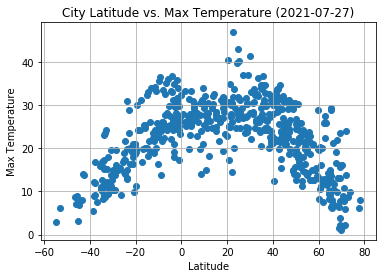

We can see that around 20 latitude is where it peaks but around the equator is still
      where is the hottest on average.


In [47]:
x_axis = df_final['Latitude']
y_axis = df_final['Max Temperature']
plt.scatter(x_axis, y_axis)
plt.title(f'City Latitude vs. Max Temperature ({timestamp})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid()
plt.savefig('/Users/novakradovic/Git/API-challenge/output/Lat_Temp.png')
plt.show()

print(f'''We can see that around 20 latitude is where it peaks but around the equator is still
      where is the hottest on average.''')


In [28]:
hot_places = df_final.loc[df_final['Max Temperature']>40]
print('''Very interesting to see that taoudenni, remote salt mining center in the desert region of northern Mali,
      has a temperature of over 46 C at the time I pulled this data!
      
      ''')
hot_places

Very interesting to see that taoudenni, remote salt mining center in the desert region of northern Mali,
      has a temperature of over 46 C at the time I pulled this data!
      
      


,City,Country,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
104,sakakah,sa,29.9697,40.2064,41.38,12.0,0.0,6.94,1.627402e+09
265,doha,kw,25.2867,51.5333,40.17,59.0,6.0,4.12,1.627402e+09
300,taoudenni,ml,22.6783,-3.9836,46.89,4.0,7.0,4.37,1.627402e+09
433,tessalit,ml,20.1986,1.0114,40.58,17.0,22.0,3.37,1.627402e+09
450,riyadh,sa,24.6877,46.7219,43.08,9.0,5.0,3.06,1.627402e+09


## Latitude vs. Humidity Plot

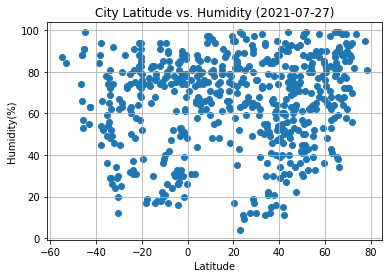

From this plot we can conclude the the northern hemisphere is more humid then the southern hemisphere.


In [48]:
x_axis = df_final['Latitude']
y_axis_1 = df_final['Humidity']
plt.scatter(x_axis, y_axis_1)
plt.title(f'City Latitude vs. Humidity ({timestamp})')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid()
plt.savefig('/Users/novakradovic/Git/API-challenge/output/Lat_Hum.png')

plt.show()
print('From this plot we can conclude the the northern hemisphere is more humid then the southern hemisphere.')

## Latitude vs. Cloudiness Plot

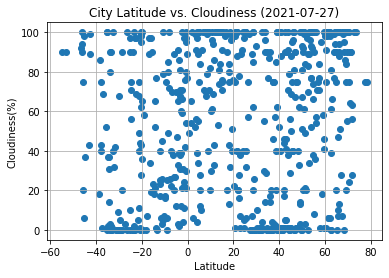

" There doesn't seem to be a corelation between the latitude and cloudiness other then taht it's more
      cloudy between the 0-20 latitude


In [49]:
x_axis = df_final['Latitude']
y_axis_2 = df_final['Cloudiness']
plt.scatter(x_axis, y_axis_2)
plt.title(f'City Latitude vs. Cloudiness ({timestamp})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid()
plt.savefig('/Users/novakradovic/Git/API-challenge/output/Lat_Cloud.png')

plt.show()
print("""" There doesn't seem to be a corelation between the latitude and cloudiness other then taht it's more
      cloudy between the 0-20 latitude""")

## Latitude vs. Wind Speed Plot

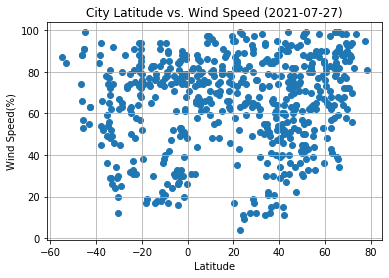

A very small correlation between increased latitude and higher speed can be observed.


In [50]:
x_axis = df_final['Latitude']
y_axis_3 = df_final['Wind Speed']
plt.scatter(x_axis, y_axis_1)
plt.title(f'City Latitude vs. Wind Speed ({timestamp})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(%)')
plt.grid()
plt.savefig('/Users/novakradovic/Git/API-challenge/output/Lat_Wind.png')

plt.show()
print('A very small correlation between increased latitude and higher speed can be observed.')

## Linear Regression

In [35]:
north_hem = df_final.loc[df_final['Latitude']>=0, :]
south_hem = df_final.loc[df_final['Latitude']<=0, :]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

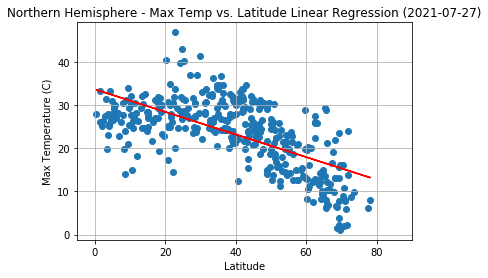

The r-value is: -0.6421704587507802
There is a somewhat strong negative correlation between the latitude and temperature.


In [51]:
from scipy.stats import linregress

x_axis_1 = north_hem['Latitude']
y_axis_1 = north_hem['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_1, y_axis_1)
regress_values = x_axis_1 * slope + intercept

plt.scatter(x_axis_1, y_axis_1)
plt.plot(x_axis_1, regress_values,"r-")
plt.title(f'Northern Hemisphere - Max Temp vs. Latitude Linear Regression ({timestamp})')
plt.xlabel('Latitude')
plt.xlim(-5, 90)
plt.ylabel('Max Temperature (C)')
plt.grid()
plt.savefig('/Users/novakradovic/Git/API-challenge/output/North_Temp.png')

plt.show()
print(f'The r-value is: {rvalue}')
print('There is a somewhat strong negative correlation between the latitude and temperature.')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

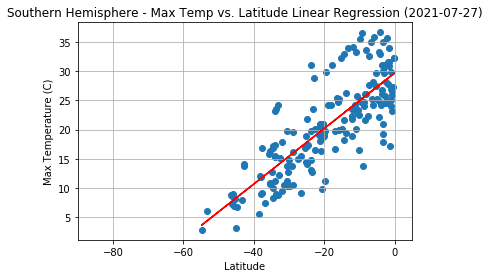

The r-valuse is: 0.8124420867975823
There is a stronger correlation between latidue and temperature in the south then the norht.


In [52]:
x_axis_2 = south_hem['Latitude']
y_axis_2 = south_hem['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_2, y_axis_2)
regress_values = x_axis_2 * slope + intercept

plt.scatter(x_axis_2, y_axis_2)
plt.plot(x_axis_2, regress_values,"r-")
plt.title(f'Southern Hemisphere - Max Temp vs. Latitude Linear Regression ({timestamp})')
plt.xlabel('Latitude')
plt.xlim(-90, 5)
plt.ylabel('Max Temperature (C)')
plt.grid()
plt.savefig('/Users/novakradovic/Git/API-challenge/output/South_Temp.png')

plt.show()

print(f'The r-valuse is: {rvalue}')
print('There is a stronger correlation between latidue and temperature in the south then the norht.')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

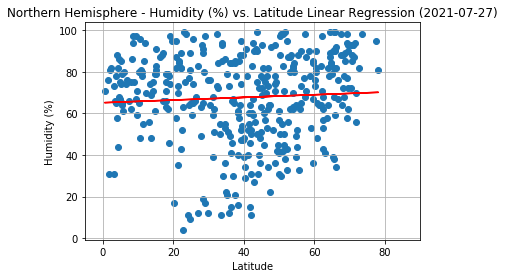

The r-valuse is: 0.059709330723713726
Very weak correlation here


In [53]:
x_axis_1 = north_hem['Latitude']
y_axis_3 = north_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_1, y_axis_3)
regress_values = x_axis_1 * slope + intercept

plt.scatter(x_axis_1, y_axis_3)
plt.plot(x_axis_1, regress_values,"r-")
plt.title(f'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({timestamp})')
plt.xlabel('Latitude')
plt.xlim(-5, 90)
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('/Users/novakradovic/Git/API-challenge/output/North_Hum.png')

plt.show()
print(f'The r-valuse is: {rvalue}')
print('Very weak correlation here')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

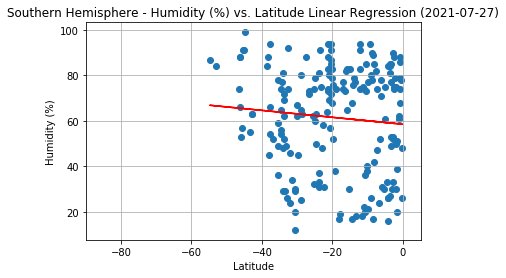

The r-valuse is: -0.09109015590157274
Another weak correlation


In [54]:
x_axis_2 = south_hem['Latitude']
y_axis_4 = south_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_2, y_axis_4)
regress_values = x_axis_2 * slope + intercept

plt.scatter(x_axis_2, y_axis_4)
plt.plot(x_axis_2, regress_values,"r-")
plt.title(f'Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({timestamp})')
plt.xlabel('Latitude')
plt.xlim(-90, 5)
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('/Users/novakradovic/Git/API-challenge/output/South_Hum.png')

plt.show()
print(f'The r-valuse is: {rvalue}')
print('Another weak correlation')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

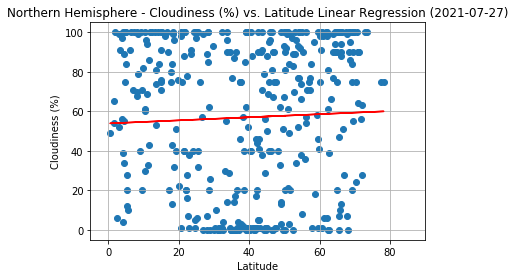

The r-valuse is: 0.0410171040750076
There is almost no correlation between latitude and cloudiness.


In [55]:
x_axis_1 = north_hem['Latitude']
y_axis_5 = north_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_1, y_axis_5)
regress_values = x_axis_1 * slope + intercept

plt.scatter(x_axis_1, y_axis_5)
plt.plot(x_axis_1, regress_values,"r-")
plt.title(f'Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({timestamp})')
plt.xlabel('Latitude')
plt.xlim(-5, 90)
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('/Users/novakradovic/Git/API-challenge/output/North_CLoud.png')

plt.show()
print(f'The r-valuse is: {rvalue}')
print('There is almost no correlation between latitude and cloudiness.')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

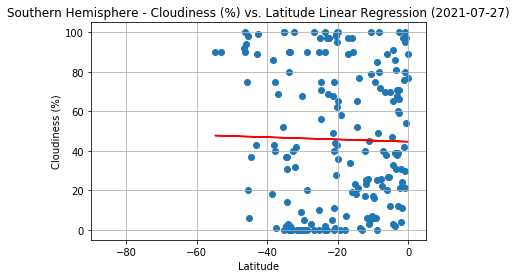

The r-valuse is: -0.0217697050015622
There is no correllation between the latitude and cloudiness in the southern hemisphere.


In [56]:
x_axis_2 = south_hem['Latitude']
y_axis_6 = south_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_2, y_axis_6)
regress_values = x_axis_2 * slope + intercept

plt.scatter(x_axis_2, y_axis_6)
plt.plot(x_axis_2, regress_values,"r-")
plt.title(f'Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({timestamp})')
plt.xlabel('Latitude')
plt.xlim(-90, 5)
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('/Users/novakradovic/Git/API-challenge/output/South_Cloud.png')

plt.show()

print(f'The r-valuse is: {rvalue}')
print('There is no correllation between the latitude and cloudiness in the southern hemisphere.')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

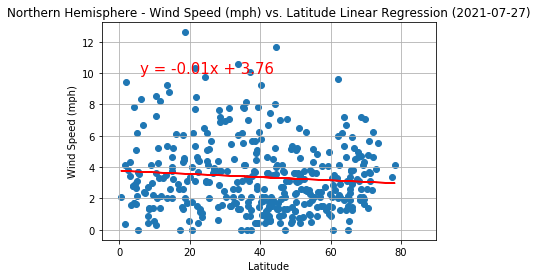

The r-valuse is: -0.08860994676662458


In [57]:
x_axis_1 = north_hem['Latitude']
y_axis_7 = north_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_1, y_axis_7)
regress_values = x_axis_1 * slope + intercept

plt.scatter(x_axis_1, y_axis_7)
plt.plot(x_axis_1, regress_values,"r-")
plt.title(f'Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({timestamp})')
plt.xlabel('Latitude')
plt.xlim(-5, 90)
plt.ylabel('Wind Speed (mph)')
plt.grid()
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig('/Users/novakradovic/Git/API-challenge/output/North_Wind.png')

plt.show()

print(f'The r-valuse is: {rvalue}')


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

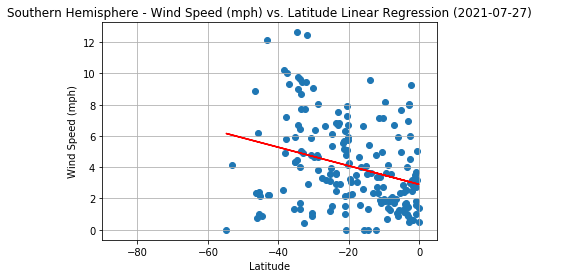

The r-valuse is: -0.29595964002105457
There is seems to be some correlation between the latitude and wind speed in the southern hemisphere.


In [58]:
x_axis_2 = south_hem['Latitude']
y_axis_8 = south_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_2, y_axis_8)
regress_values = x_axis_2 * slope + intercept

plt.scatter(x_axis_2, y_axis_8)
plt.plot(x_axis_2, regress_values,"r-")
plt.title(f'Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({timestamp})')
plt.xlabel('Latitude')
plt.xlim(-90, 5)
plt.ylabel('Wind Speed (mph)')
plt.grid()
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig('/Users/novakradovic/Git/API-challenge/output/South_Wind.png')

plt.show()

print(f'The r-valuse is: {rvalue}')
print('There is seems to be some correlation between the latitude and wind speed in the southern hemisphere.')